<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [12]:
X_scaled = transform.fit_transform(X)


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [13]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1, stratify=Y)


we can see we only have 18 test samples.


In [15]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10, scoring='accuracy', n_jobs=-1)
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [23]:
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8339285714285716


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


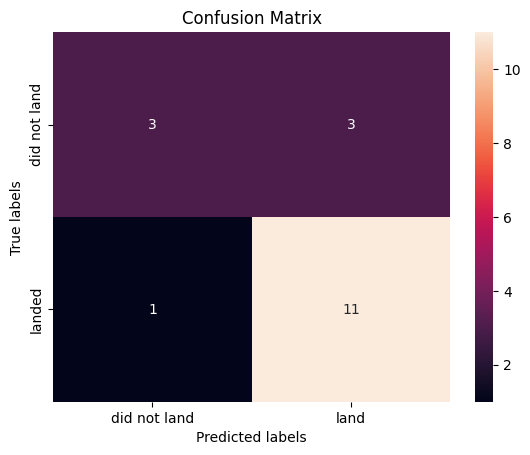

In [24]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# estimator the later cells refer to
svm = SVC()

# parameter grid for SVM
parameters = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C": [0.01, 0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring="accuracy", n_jobs=-1)
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

Lets look at the confusion matrix:


tuned hyperparameters :(best parameters)  {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
accuracy : 0.8482142857142858
test accuracy : 0.8333333333333334


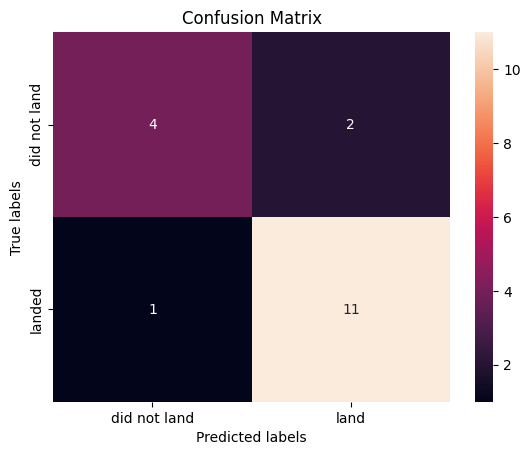

In [28]:
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)
print("test accuracy :", svm_cv.score(X_test, Y_test))

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [29]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

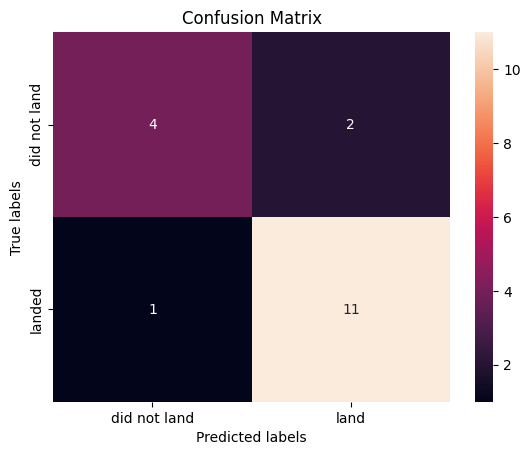

In [31]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [32]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
accuracy : 0.8482142857142858


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=1)

parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 2, 4]
}

tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring="accuracy", n_jobs=-1)
tree_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

We can plot the confusion matrix


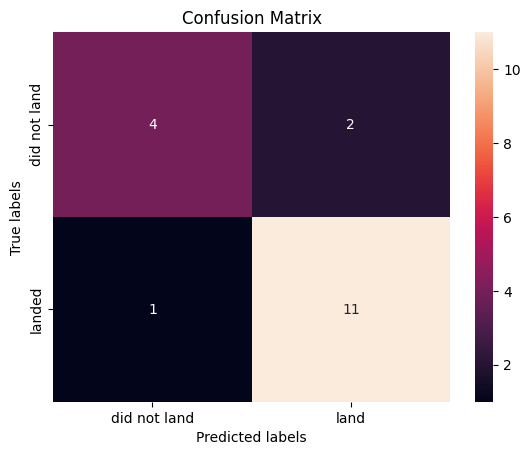

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV accuracy : 0.8910714285714286
test accuracy : 0.8333333333333334


In [34]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("CV accuracy :", tree_cv.best_score_)
print("test accuracy :", tree_cv.score(X_test, Y_test))


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


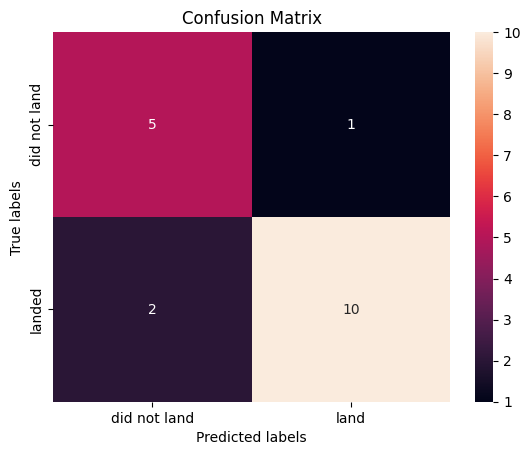

In [35]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat, digits=3))


              precision    recall  f1-score   support

           0      0.714     0.833     0.769         6
           1      0.909     0.833     0.870        12

    accuracy                          0.833        18
   macro avg      0.812     0.833     0.819        18
weighted avg      0.844     0.833     0.836        18



In [37]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
accuracy : 0.8910714285714286


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN = KNeighborsClassifier()

parameters = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # 1=Manhattan, 2=Euclidean
}

knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, scoring="accuracy", n_jobs=-1)
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

We can plot the confusion matrix


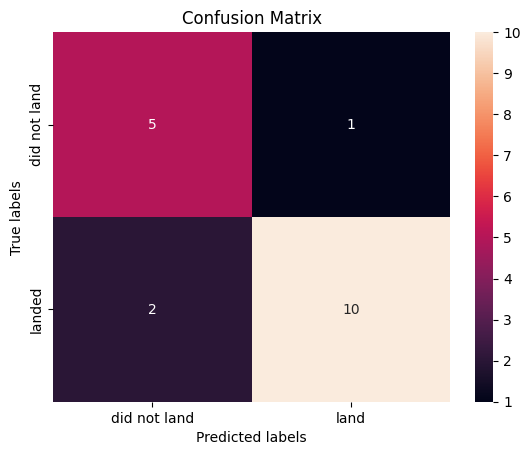

tuned hyperparameters :(best parameters)  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
CV accuracy : 0.8482142857142858
test accuracy : 0.8333333333333334


In [39]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("CV accuracy :", knn_cv.best_score_)
print("test accuracy :", knn_cv.score(X_test, Y_test))


## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


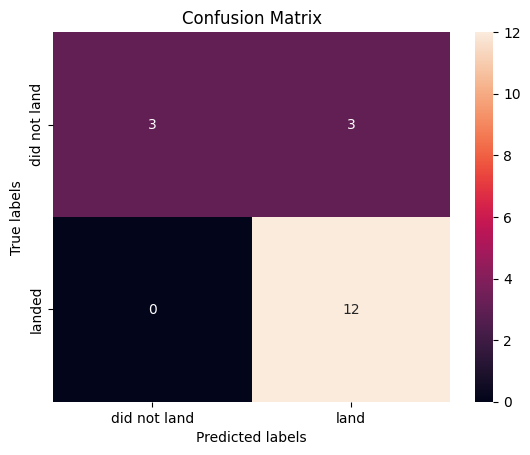

In [40]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


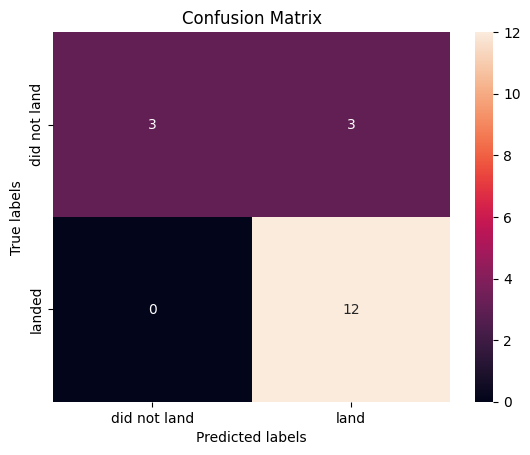

In [41]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [42]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [43]:
from sklearn.metrics import accuracy_score, f1_score

results = {
    "LogReg": (accuracy_score(Y_test, logreg_cv.predict(X_test)), f1_score(Y_test, logreg_cv.predict(X_test))),
    "SVM":    (accuracy_score(Y_test, svm_cv.predict(X_test)),    f1_score(Y_test, svm_cv.predict(X_test))),
    "Tree":   (accuracy_score(Y_test, tree_cv.predict(X_test)),   f1_score(Y_test, tree_cv.predict(X_test))),
    "KNN":    (accuracy_score(Y_test, knn_cv.predict(X_test)),    f1_score(Y_test, knn_cv.predict(X_test))),
}
results


{'LogReg': (0.7777777777777778, 0.8461538461538461),
 'SVM': (0.8333333333333334, 0.88),
 'Tree': (0.8333333333333334, 0.8695652173913043),
 'KNN': (0.8333333333333334, 0.8888888888888888)}

We can plot the confusion matrix


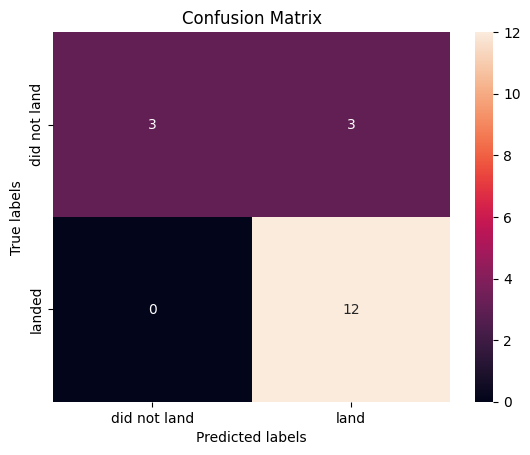

In [44]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [45]:
best_model, (best_acc, best_f1) = max(results.items(), key=lambda kv: kv[1][0])
print("Best model:", best_model)
print("Accuracy :", best_acc)
print("F1-score :", best_f1)


Best model: SVM
Accuracy : 0.8333333333333334
F1-score : 0.88


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>


In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
from matplotlib import patheffects as pe

def _box(ax, xy, w, h, text, fc="#0D3B66", ec="#0D3B66", tc="white", fs=12, lw=1.2, r=0.05):
    rect = Rectangle(xy, w, h, facecolor=fc, edgecolor=ec, linewidth=lw,
                     transform=ax.transAxes, clip_on=False, joinstyle="round",
                     zorder=3)
    rect.set_path_effects([pe.withStroke(linewidth=lw+1.2, foreground=ec)])
    ax.add_patch(rect)
    ax.text(xy[0]+w/2, xy[1]+h/2, text, color=tc, fontsize=fs, ha="center", va="center",
            transform=ax.transAxes)
    return rect

def _arrow(ax, src, dst, color="#444444", lw=1.8, style="-|>", shrink=0.0):
    """src, dst are (x,y) centers in axes coords"""
    a = FancyArrowPatch(posA=src, posB=dst, arrowstyle=style,
                        mutation_scale=12, linewidth=lw,
                        connectionstyle="arc3", color=color,
                        transform=ax.transAxes)
    ax.add_patch(a)
    return a

def _figure(title):
    fig, ax = plt.subplots(figsize=(11.2, 3.8), dpi=200)
    ax.set_title(title, fontsize=14, pad=12)
    ax.axis("off")
    return fig, ax


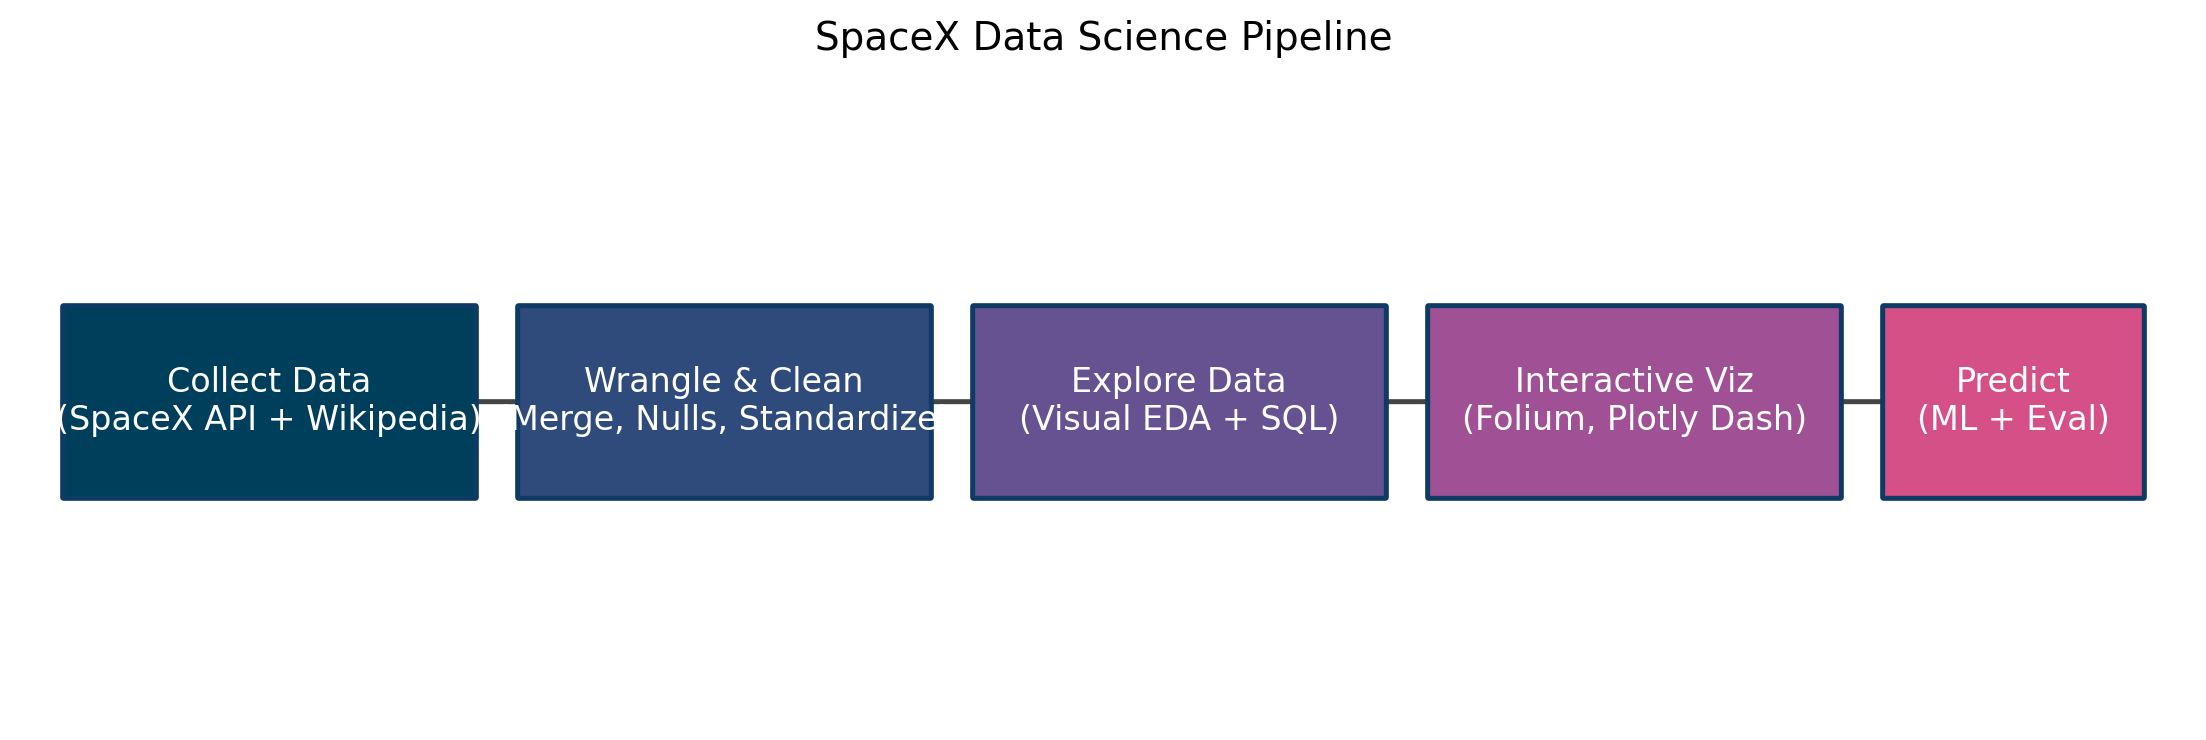

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'methodology_pipeline.png'

In [52]:
fig, ax = _figure("SpaceX Data Science Pipeline")

boxes = []
boxes.append(_box(ax, (0.02, .35), .19, .3, "Collect Data\n(SpaceX API + Wikipedia)", fc="#003f5c"))
boxes.append(_box(ax, (0.23, .35), .19, .3, "Wrangle & Clean\n(Merge, Nulls, Standardize)", fc="#2f4b7c"))
boxes.append(_box(ax, (0.44, .35), .19, .3, "Explore Data\n(Visual EDA + SQL)", fc="#665191"))
boxes.append(_box(ax, (0.65, .35), .19, .3, "Interactive Viz\n(Folium, Plotly Dash)", fc="#a05195"))
boxes.append(_box(ax, (0.86, .35), .12, .3, "Predict\n(ML + Eval)", fc="#d45087"))

centers = [(b.get_x()+b.get_width()/2, b.get_y()+b.get_height()/2) for b in boxes]
for i in range(len(centers)-1):
    _arrow(ax, centers[i], centers[i+1])

plt.tight_layout()
plt.savefig("methodology_pipeline.png", bbox_inches="tight")
plt.show()


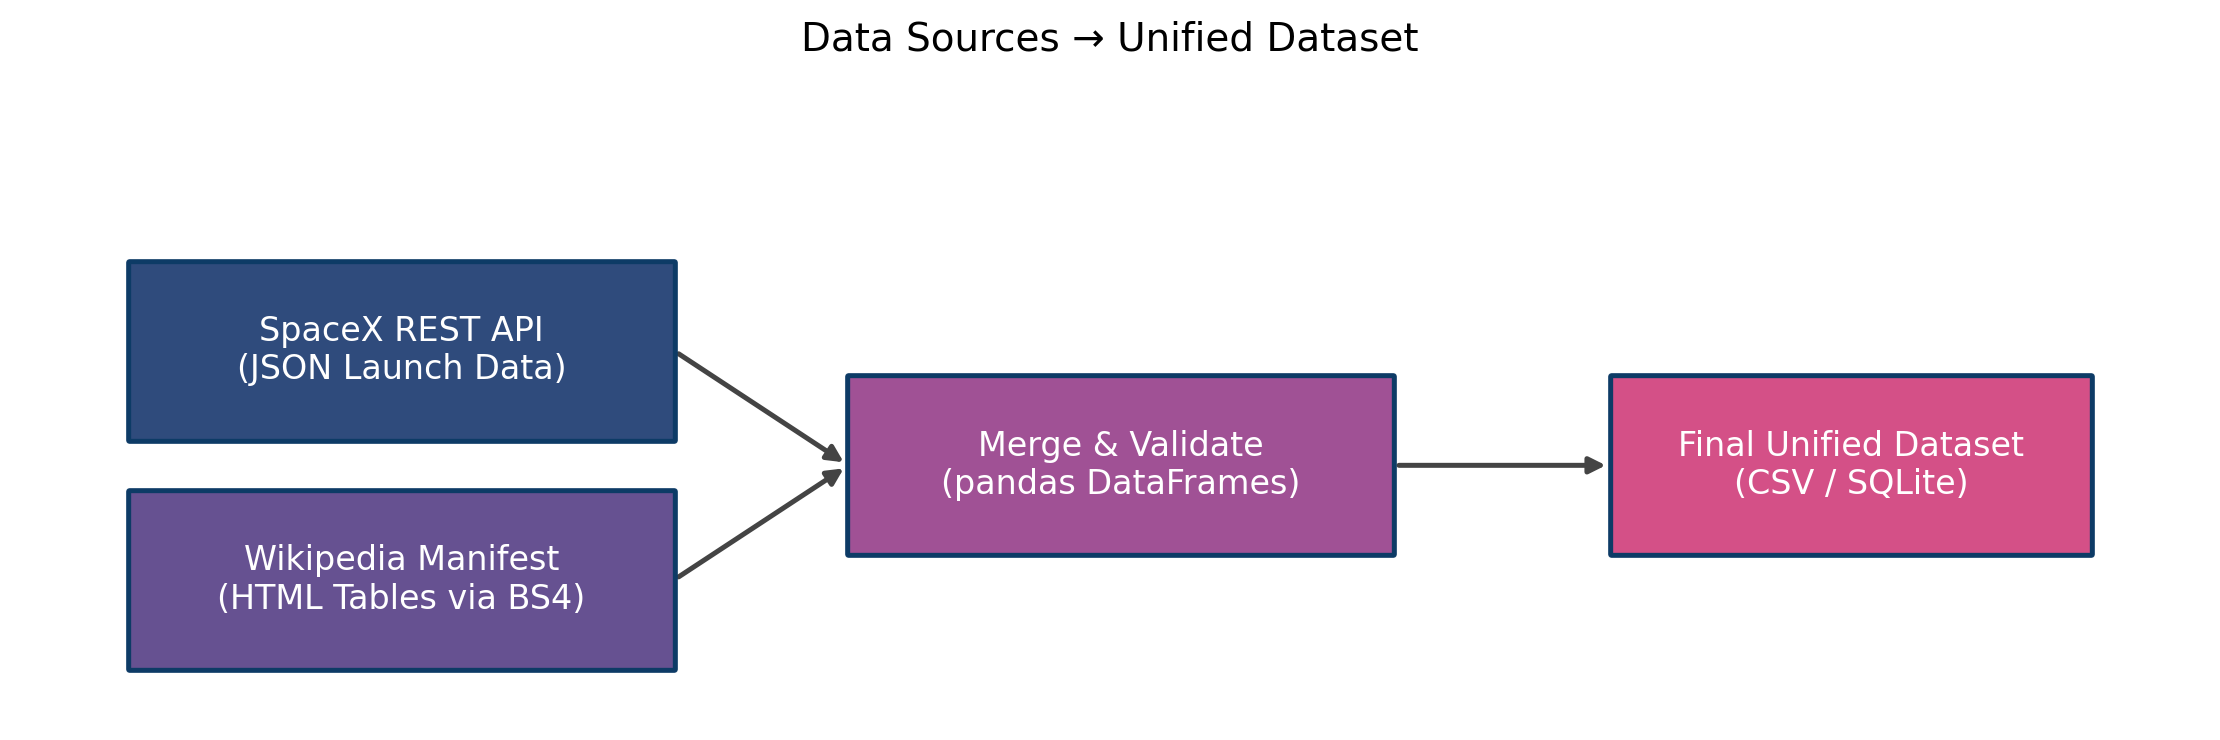

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'data_sources_flow.png'

In [53]:
fig, ax = _figure("Data Sources → Unified Dataset")

api  = _box(ax, (0.05,.44), .25,.28, "SpaceX REST API\n(JSON Launch Data)", fc="#2f4b7c")
wiki = _box(ax, (0.05,.08), .25,.28, "Wikipedia Manifest\n(HTML Tables via BS4)", fc="#665191")
merge = _box(ax, (0.38,.26), .25,.28, "Merge & Validate\n(pandas DataFrames)", fc="#a05195")
final = _box(ax, (0.73,.26), .22,.28, "Final Unified Dataset\n(CSV / SQLite)", fc="#d45087")

_arrow(ax, (api.get_x()+api.get_width(), api.get_y()+api.get_height()/2), 
           (merge.get_x(), merge.get_y()+merge.get_height()/2))
_arrow(ax, (wiki.get_x()+wiki.get_width(), wiki.get_y()+wiki.get_height()/2), 
           (merge.get_x(), merge.get_y()+merge.get_height()/2))
_arrow(ax, (merge.get_x()+merge.get_width(), merge.get_y()+merge.get_height()/2), 
           (final.get_x(), final.get_y()+final.get_height()/2))

plt.tight_layout()
plt.savefig("data_sources_flow.png", bbox_inches="tight")
plt.show()


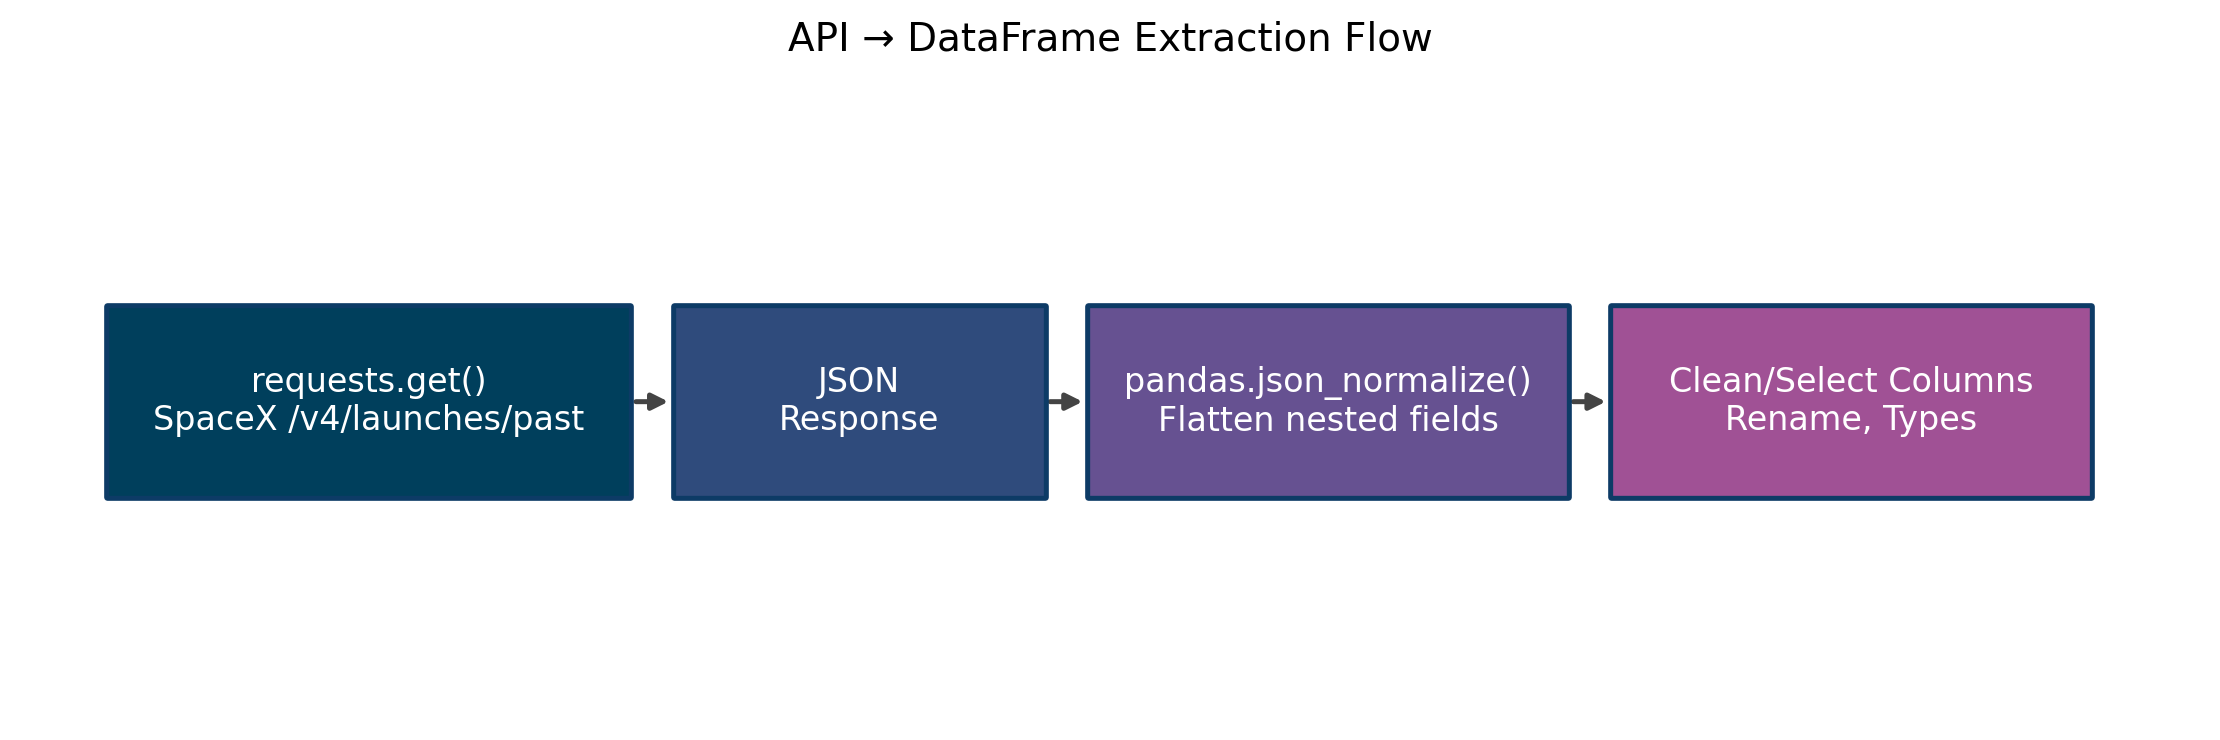

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'api_extraction_flow.png'

In [54]:
fig, ax = _figure("API → DataFrame Extraction Flow")

a = _box(ax, (0.04,.35), .24,.3, "requests.get()\nSpaceX /v4/launches/past", fc="#003f5c")
b = _box(ax, (0.30,.35), .17,.3, "JSON\nResponse", fc="#2f4b7c")
c = _box(ax, (0.49,.35), .22,.3, "pandas.json_normalize()\nFlatten nested fields", fc="#665191")
d = _box(ax, (0.73,.35), .22,.3, "Clean/Select Columns\nRename, Types", fc="#a05195")

_arrow(ax, (a.get_x()+a.get_width(), .50), (b.get_x(), .50))
_arrow(ax, (b.get_x()+b.get_width(), .50), (c.get_x(), .50))
_arrow(ax, (c.get_x()+c.get_width(), .50), (d.get_x(), .50))

plt.tight_layout()
plt.savefig("api_extraction_flow.png", bbox_inches="tight")
plt.show()


In [55]:
from graphviz import Digraph

g = Digraph('ScrapingFlow', format='png')
g.attr(rankdir='LR', size='10,3', bgcolor='white')

g.attr('node', shape='box', style='filled', fontname='Helvetica', fontsize='11')
g.node('A', 'Wikipedia Falcon 9 Page\n(HTML Source)', fillcolor='#1b4332', fontcolor='white')
g.node('B', 'BeautifulSoup Parsing\n(find_all("table"))', fillcolor='#2d6a4f', fontcolor='white')
g.node('C', 'Extract Rows/Cols\n(Booster, Payload, Orbit)', fillcolor='#40916c', fontcolor='white')
g.node('D', 'Clean Text\n(Trim, Type Conversion)', fillcolor='#52b788', fontcolor='black')
g.node('E', 'Merge with API Data\n(on flight_number/date)', fillcolor='#74c69d', fontcolor='black')

g.edges(['AB','BC','CD','DE'])

g.render('web_scraping_flow', view=True)


<class 'ModuleNotFoundError'>: No module named 'graphviz'

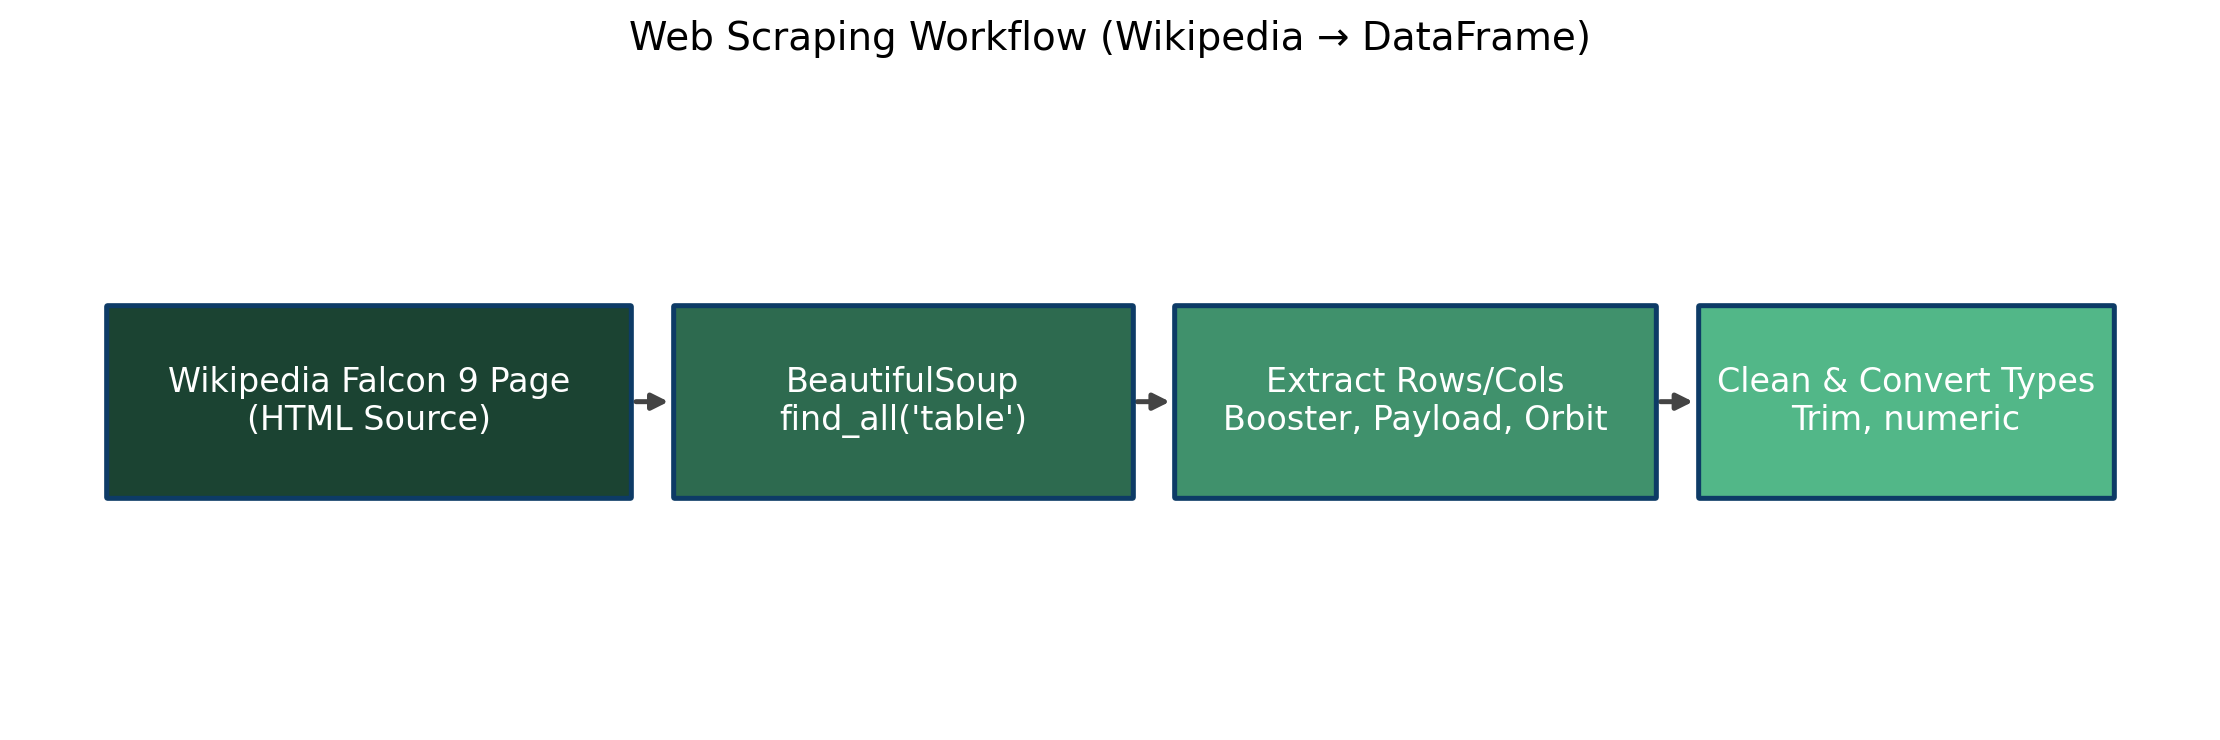

In [56]:
fig, ax = _figure("Web Scraping Workflow (Wikipedia → DataFrame)")

a = _box(ax, (0.04,.35), .24,.3, "Wikipedia Falcon 9 Page\n(HTML Source)", fc="#1b4332")
b = _box(ax, (0.30,.35), .21,.3, "BeautifulSoup\nfind_all('table')", fc="#2d6a4f")
c = _box(ax, (0.53,.35), .22,.3, "Extract Rows/Cols\nBooster, Payload, Orbit", fc="#40916c")
d = _box(ax, (0.77,.35), .19,.3, "Clean & Convert Types\nTrim, numeric", fc="#52b788")

_arrow(ax, (a.get_x()+a.get_width(), .50), (b.get_x(), .50))
_arrow(ax, (b.get_x()+b.get_width(), .50), (c.get_x(), .50))
_arrow(ax, (c.get_x()+c.get_width(), .50), (d.get_x(), .50))

plt.tight_layout()
plt.savefig("web_scraping_flow.png", bbox_inches="tight")
plt.show()
